In [50]:
import os
import random
import h5py
import numpy as np

gps_logs_folder = r'C:\Users\bjqb7h\Downloads\Thesis2022\NUMPY\New\New Logs'
semseg_logs_folder = r'C:\Users\bjqb7h\Downloads\Thesis2022\Semantic Segmentaiton Logs'
Labels_folder = r'C:\Users\bjqb7h\Downloads\Thesis2022\GT TRANSLATIONS\SYNC TARGET'

# Get a list of all H5 logs in the gps_logs_folder
gps_logs = [f for f in os.listdir(gps_logs_folder) if f.endswith('.hdf5')]

# Randomly select a log from gps_logs_folder
random_gps_log = random.choice(gps_logs)


# Find the corresponding log in semseg_logs_folder with the same name (excluding "_GPSNOISE1")
# log_name = os.path.splitext(random_gps_log)[0]
# log_name = log_name.split('GPS')[0]
log_name='AtCityBMW_Applanix-20220228T154254Z933GPSNOISE1'
log_name =log_name + '.hdf5'
random_gps_log=log_name
log_name = log_name.split('GPS')[0]
print(random_gps_log)
matching_semseg_log = [f for f in os.listdir(semseg_logs_folder) if log_name in f]


# Load image arrays from the selected logs
with h5py.File(os.path.join(gps_logs_folder, random_gps_log), 'r') as gps_file:
    print(gps_file)
    gps_image_data = gps_file[log_name]['Image data'][:, :, :, :]

    
semseg_path=os.path.join(semseg_logs_folder, matching_semseg_log[0])
print(semseg_path)
with h5py.File(semseg_path, 'r') as semseg_file:
    semseg_image_data = semseg_file['grid_prediction'][:,:,:,:]
    
Labels_path=os.path.join(Labels_folder, (log_name+'.npy'))
print(Labels_path)
Labels =np.load(Labels_path)


A = len(gps_image_data)
sem_data = semseg_image_data[:A]
sem_data = np.reshape(sem_data, (A, 160, 160, 3))
sem_data = sem_data[:, :, :, :]

# Display the image arrays side by side
print("GPS Log:", random_gps_log)
print("Semseg Log:", matching_semseg_log)
print("GPS Image Array Shape:", gps_image_data.shape)
print("Semseg Image Array Shape:", sem_data.shape)
print("LABELS FOR THE LOG",Labels.shape)

# Assuming you have a way to visualize the image arrays (e.g., using matplotlib)
# Replace the following lines with your actual visualization code.
# For example, if you are using matplotlib, you can do something like this:
# import matplotlib.pyplot as plt
# plt.subplot(1, 2, 1)
# plt.imshow(gps_image_data[0])  # Assuming the first image in the array is to be displayed
# plt.title("GPS Image")
# plt.subplot(1, 2, 2)
# plt.imshow(semseg_image_data[0])  # Assuming the first image in the array is to be displayed
# plt.title("Semseg Image")
# plt.show()

AtCityBMW_Applanix-20220228T154254Z933GPSNOISE1.hdf5
<HDF5 file "AtCityBMW_Applanix-20220228T154254Z933GPSNOISE1.hdf5" (mode r)>
C:\Users\bjqb7h\Downloads\Thesis2022\Semantic Segmentaiton Logs\AtCityBMW_Applanix-20220228T154254Z933.h5
C:\Users\bjqb7h\Downloads\Thesis2022\GT TRANSLATIONS\SYNC TARGET\AtCityBMW_Applanix-20220228T154254Z933.npy
GPS Log: AtCityBMW_Applanix-20220228T154254Z933GPSNOISE1.hdf5
Semseg Log: ['AtCityBMW_Applanix-20220228T154254Z933.h5']
GPS Image Array Shape: (860, 160, 160, 4)
Semseg Image Array Shape: (860, 160, 160, 3)
LABELS FOR THE LOG (860, 2)


832


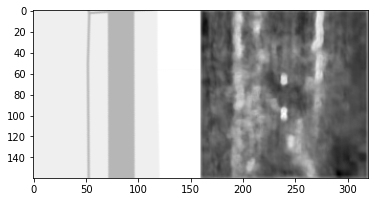

In [54]:
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'
P=random.randint(0,A)


#USING GPS HDF5 dATASET
t1_slice = gps_image_data[P,:,:,1]
#t1_slice = np.flip(t1_slice, axis=1)
GPS_data = t1_slice


# FreeSemseg=np.rot90(SemsegData[P,:,:,0],2)
# OccSemseg=np.rot90(SemsegData[P,:,:,1],2)
# NewSemseg = np.rot90(NSem[P,:,:,1],2)

# #DGPS values
t3_slice = sem_data[P,:,:,2]
#t3_slice = np.flip(t3_slice, axis=1)
DGPS_data = t3_slice



# GPS_data = GPS_data/GPS_data.max()
# Semseg_data = NewSemseg/NewSemseg.max()
#OLDSEMSEG = OLDSEMSEG/OLDSEMSEG.max()
DGPS_data=DGPS_data/DGPS_data.max()
GPS_data = GPS_data/GPS_data.max()
# OccSemseg=OccSemseg/OccSemseg.max()


#plt.imshow(np.hstack((Semseg_data,GPS_data,DGPS_data)))
plt.imshow(np.hstack((GPS_data,DGPS_data)))
print(P)


In [30]:
label = np.load(r'C:\Users\bjqb7h\Downloads\Thesis2022\GT TRANSLATIONS\SYNC TARGET\AtCityBMW_Applanix-20220221T161110Z753.npy')

In [22]:
print(label.shape)

(556, 2)


In [23]:
print(label[332])

[-1.0134153  1.5266933]
